In [69]:
# Importing the neccesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [70]:
# Load the dataset
df=pd.read_csv(r'C:\Users\Nandata.csv')
df

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007567,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685622,NaN,83.974852,87.738591,Yes
...,...,...,...,...,...,...,...
9995,Treatment,NaN,259.695935,415.181694,88.438776,98.418593,NaN
9996,Control,High Value,186.488285,216.225457,92.261537,100.000000,NaN
9997,Treatment,Low Value,208.107142,322.893351,55.915870,NaN,No
9998,Treatment,Medium Value,NaN,431.974901,66.082462,81.274030,No


In [71]:
# top records of the dataset
df.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007567,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685622,NaN,83.974852,87.738591,Yes


In [72]:
#columns in this dataset
df.columns

Index(['Group', 'Customer_Segment', 'Sales_Before', 'Sales_After',
       'Customer_Satisfaction_Before', 'Customer_Satisfaction_After',
       'Purchase_Made'],
      dtype='object')

In [73]:
# Display column names
print(df.columns)

Index(['Group', 'Customer_Segment', 'Sales_Before', 'Sales_After',
       'Customer_Satisfaction_Before', 'Customer_Satisfaction_After',
       'Purchase_Made'],
      dtype='object')


In [74]:
#describe the dataset
df.describe()

,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
count,8478.000000,9233.000000,8330.000000,8360.000000
mean,203.716998,280.457952,70.252076,73.872593
std,55.273059,85.659543,16.957010,18.128351
min,24.852966,32.414352,22.202441,18.224938
25%,166.629233,221.436990,56.365513,59.925030
50%,203.323607,273.129170,69.490898,73.844594
75%,238.809147,332.570108,83.426798,90.044365
max,545.422547,818.219997,100.000000,100.000000


In [75]:
missing_value=["N/a","na",np.nan]
df=pd.read_csv(r'C:\Users\Nandata.csv',na_values=missing_value)

In [76]:
#check for missing values
df.isnull().sum().sort_values(ascending=False)

Customer_Segment                1966
Customer_Satisfaction_Before    1670
Customer_Satisfaction_After     1640
Sales_Before                    1522
Group                           1401
Purchase_Made                    805
Sales_After                      767
dtype: int64

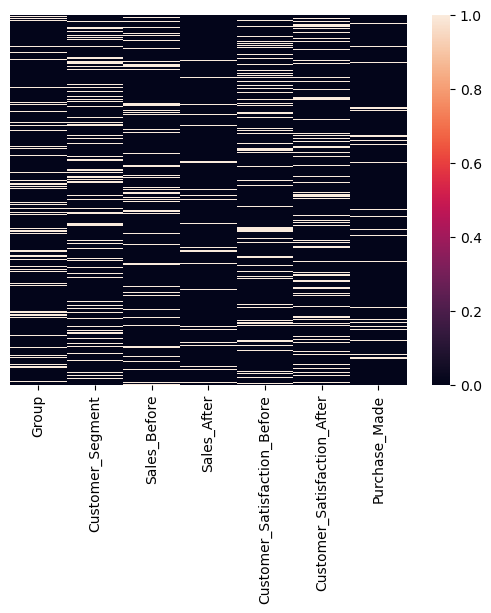

In [77]:
sns.heatmap(df.isnull(), yticklabels=False)
plt.show()

In [78]:
#Change missing values information into percentage
# take all the missing values on top/ total rows , Length of the df Len(df)
miss_value=df.isnull().sum().sort_values(ascending=False)
miss_pct=(miss_value/len(df))*100
miss_pct[miss_pct>0]

Customer_Segment                19.66
Customer_Satisfaction_Before    16.70
Customer_Satisfaction_After     16.40
Sales_Before                    15.22
Group                           14.01
Purchase_Made                    8.05
Sales_After                      7.67
dtype: float64

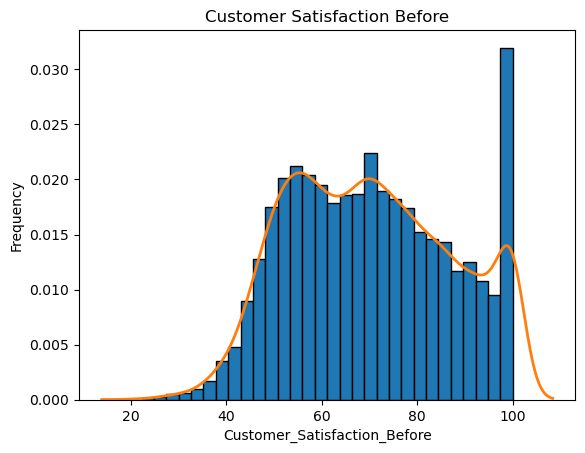

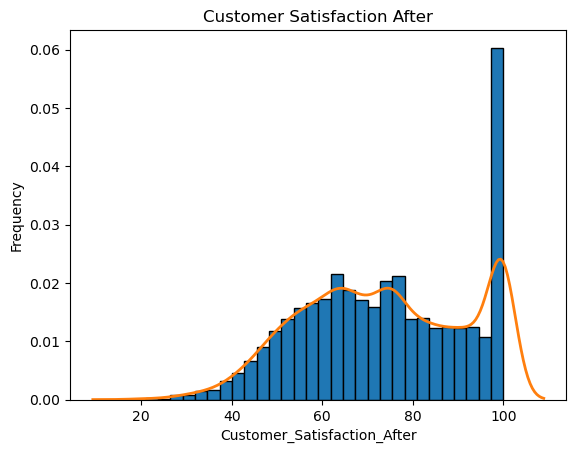

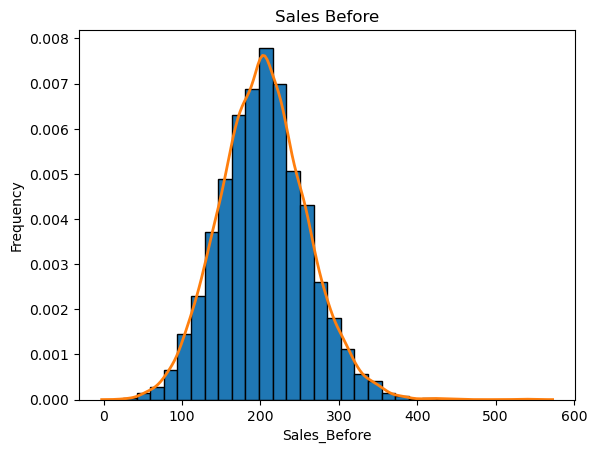

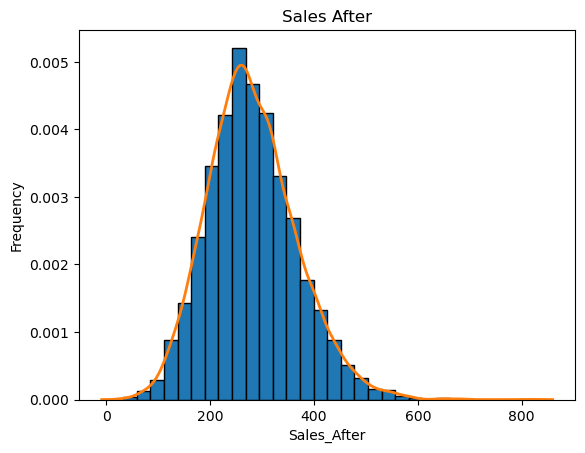

In [79]:
# Check if numerical columns are normally distributed

# Customer_Satisfaction_Before
plt.hist(x=df['Customer_Satisfaction_Before'], bins=30, edgecolor='000000', density=True)
sns.kdeplot(df["Customer_Satisfaction_Before"], linewidth=2)
plt.xlabel('Customer_Satisfaction_Before')
plt.ylabel('Frequency')
plt.title('Customer Satisfaction Before')
plt.show()

# Customer_Satisfaction_After
plt.hist(x=df['Customer_Satisfaction_After'], bins=30, edgecolor='000000', density=True)

sns.kdeplot(df["Customer_Satisfaction_After"], linewidth=2)
plt.xlabel('Customer_Satisfaction_After')
plt.ylabel('Frequency')
plt.title('Customer Satisfaction After')
plt.show()

# Sales_Before
plt.hist(x=df['Sales_Before'], bins=30, edgecolor='000000', density=True)

sns.kdeplot(df["Sales_Before"], linewidth=2)
plt.xlabel('Sales_Before')
plt.ylabel('Frequency')
plt.title('Sales Before')
plt.show()

# Sales_After
plt.hist(x=df['Sales_After'], bins=30, edgecolor='000000', density=True)

sns.kdeplot(df["Sales_After"], linewidth=2)
plt.xlabel('Sales_After')
plt.ylabel('Frequency')
plt.title('Sales After')
plt.show()

In [80]:
# Calculate skewness for selected numerical columns
selected_columns = ['Sales_Before', 'Sales_After', 'Customer_Satisfaction_Before', 'Customer_Satisfaction_After']
skewness_values = df[selected_columns].skew()

print('Skewness for selected numerical columns:', skewness_values)

Skewness for selected numerical columns: Sales_Before                    0.226509
Sales_After                     0.451744
Customer_Satisfaction_Before    0.117870
Customer_Satisfaction_After    -0.112185
dtype: float64


In [81]:
# Find the mean for Customer Satisfaction Before & Customer Satisfaction After
mean_customer_satisfaction_before = df['Customer_Satisfaction_Before'].mean()
mean_customer_satisfaction_after = df['Customer_Satisfaction_After'].mean()

print('Mean of Customer Satisfaction Before:', mean_customer_satisfaction_before)
print('Mean of Customer Satisfaction After:', mean_customer_satisfaction_after)

Mean of Customer Satisfaction Before: 70.25207641696278
Mean of Customer Satisfaction After: 73.87259310730981


In [82]:
# Find median of the Sales Before & Sales After
median_sales_before = df['Sales_Before'].median()
median_sales_after = df['Sales_After'].median()

print('Median of Sales Before:', median_sales_before)
print('Median of Sales After:', median_sales_after)

Median of Sales Before: 203.32360655
Median of Sales After: 273.1291701


In [83]:
# Replace the missing values using the mean values for Customer Satisfaction Before & Customer Satisfaction After
df['Customer_Satisfaction_Before'] = df['Customer_Satisfaction_Before'].fillna(df['Customer_Satisfaction_Before'].mean())
df['Customer_Satisfaction_After'] = df['Customer_Satisfaction_After'].fillna(df['Customer_Satisfaction_After'].mean())

# Verify that the missing values are replaced
print(df.isnull().sum())

# Replace the missing values using the median values for Sales Before & Sales After
df['Sales_Before'] = df['Sales_Before'].fillna(df['Sales_Before'].median())
df['Sales_After'] = df['Sales_After'].fillna(df['Sales_After'].median())

# Verify that the missing values were replaced
print(df.isnull().sum())

Group                           1401
Customer_Segment                1966
Sales_Before                    1522
Sales_After                      767
Customer_Satisfaction_Before       0
Customer_Satisfaction_After        0
Purchase_Made                    805
dtype: int64
Group                           1401
Customer_Segment                1966
Sales_Before                       0
Sales_After                        0
Customer_Satisfaction_Before       0
Customer_Satisfaction_After        0
Purchase_Made                    805
dtype: int64


In [84]:
# Filling missing values in a categorical column with the mode using .loc[]
categorical_columns = ['Group', 'Customer_Segment', 'Purchase_Made']

for column in categorical_columns:
    mode_value = df[column].mode()[0]
    df.loc[:, column] = df.loc[:, column].fillna(mode_value)

# Verify if missing values are filled
print(df[categorical_columns].isnull().sum())

Group               0
Customer_Segment    0
Purchase_Made       0
dtype: int64


In [85]:
#check for missing values
df.isnull().sum()

Group                           0
Customer_Segment                0
Sales_Before                    0
Sales_After                     0
Customer_Satisfaction_Before    0
Customer_Satisfaction_After     0
Purchase_Made                   0
dtype: int64

In [86]:
# Check for duplicate rows
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Display the result
print(f"Number of duplicate rows: {num_duplicates}")

# If you want to display the actual duplicate rows:
if num_duplicates > 0:
    duplicate_rows = df[duplicates]
    print("Duplicate rows:\n", duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


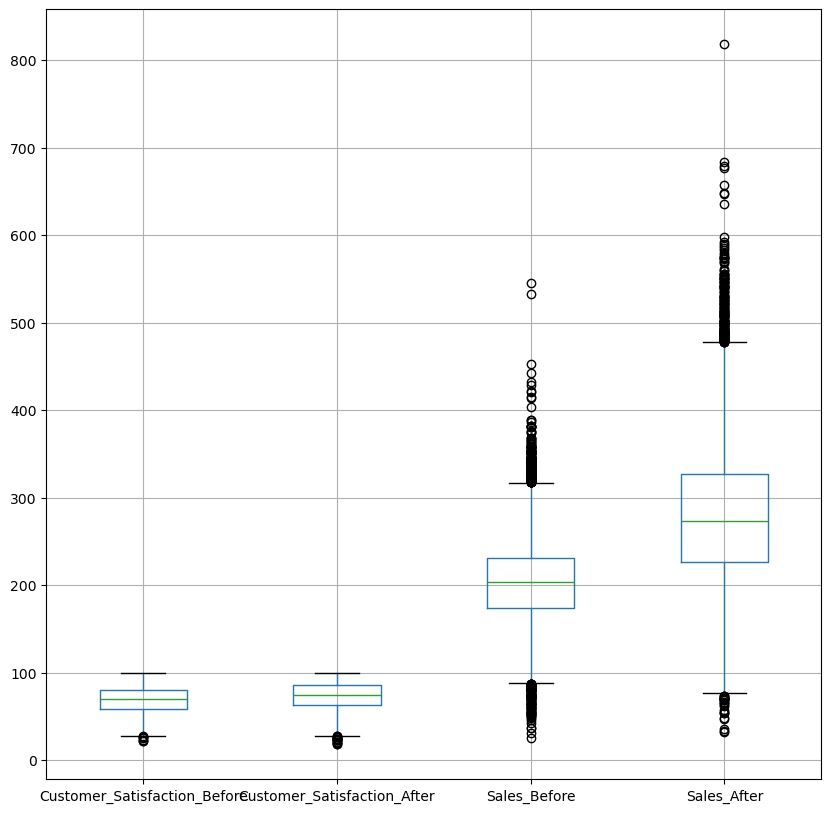

In [87]:
# Checking for outliers in the dataset

# Create box plots for all numerical columns
df[['Customer_Satisfaction_Before', 'Customer_Satisfaction_After', 'Sales_Before', 'Sales_After']].boxplot(figsize=(10, 10))

# Show the plot
plt.show()

Cleaned dataset without outliers:
           Group Customer_Segment  Sales_Before  Sales_After  \
0       Control       High Value    240.548359   300.007567   
1     Treatment       High Value    246.862114   381.337555   
2       Control       High Value    156.978084   179.330464   
3       Control     Medium Value    192.126708   229.278031   
4       Control       High Value    229.685622   273.129170   
...         ...              ...           ...          ...   
9995  Treatment        Low Value    259.695935   415.181694   
9996    Control       High Value    186.488285   216.225457   
9997  Treatment        Low Value    208.107142   322.893351   
9998  Treatment     Medium Value    203.323607   431.974901   
9999    Control        Low Value    203.323607   124.402398   

      Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                        74.684767                    73.872593            No  
1                       100.000000              

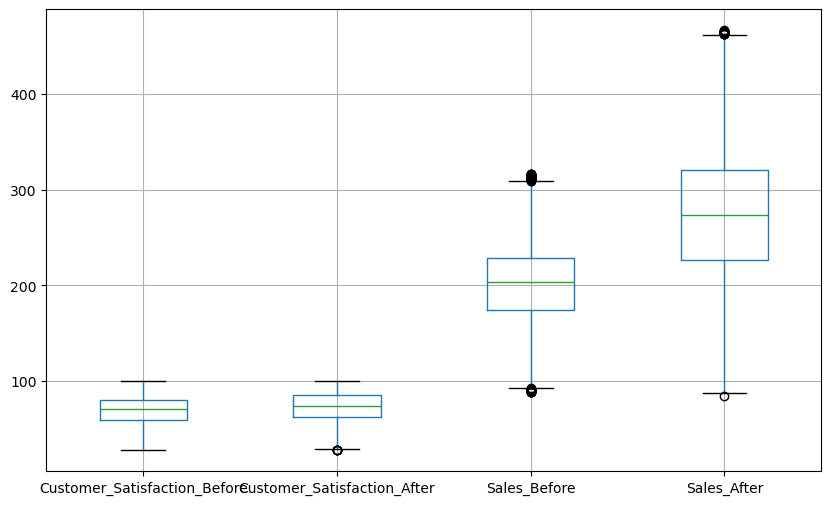

In [88]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile (Q1)
    Q3 = df[column].quantile(0.75)  # 75th percentile (Q3)
    IQR = Q3 - Q1  # Interquartile Range

    # Define the lower and upper bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned

# Apply the function to remove outliers for columns with numerical data
df_cleaned = df.copy()

columns_to_clean = ['Customer_Satisfaction_Before', 'Customer_Satisfaction_After', 'Sales_Before', 'Sales_After']
for col in columns_to_clean:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# Print the cleaned dataset (without outliers)
print("Cleaned dataset without outliers:\n", df_cleaned)

# Check for outliers in the cleaned data again using boxplot
df_cleaned[['Customer_Satisfaction_Before', 'Customer_Satisfaction_After', 'Sales_Before', 'Sales_After']].boxplot(figsize=(10, 6))

plt.show()

In [89]:
# Create a new feature: Sales Change Percentage
df_cleaned['Sales_Change_Percentage'] = ((df_cleaned['Sales_After'] - df_cleaned['Sales_Before']) / df_cleaned['Sales_Before']) * 100

# Replace infinite values with NaN (in case 'Sales_Before' is 0 for some entries)
df_cleaned['Sales_Change_Percentage'] = df_cleaned['Sales_Change_Percentage'].replace([np.inf, -np.inf], np.nan)

# Check the updated DataFrame
print(df_cleaned[['Sales_Before', 'Sales_After', 'Sales_Change_Percentage']].head())

   Sales_Before  Sales_After  Sales_Change_Percentage
0    240.548359   300.007567                24.718193
1    246.862114   381.337555                54.473908
2    156.978084   179.330464                14.239172
3    192.126708   229.278031                19.336886
4    229.685622   273.129170                18.914352


In [90]:
print(df_cleaned.columns)

Index(['Group', 'Customer_Segment', 'Sales_Before', 'Sales_After',
       'Customer_Satisfaction_Before', 'Customer_Satisfaction_After',
       'Purchase_Made', 'Sales_Change_Percentage'],
      dtype='object')


In [91]:
# check for duplicates
df_cleaned.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 9525, dtype: bool

In [92]:
# Label Encoding for 'Purchase_Made' column
df_cleaned['Purchase_Made'] = df_cleaned['Purchase_Made'].map({'Yes': 1, 'No': 0})

# Check if encoding was applied
print("Encoded 'Purchase_Made':\n", df_cleaned[['Purchase_Made']].head())

# Save the updated DataFrame after encoding and adding the new variable
df_cleaned.to_csv(r'C:\Users\DataCleaned.csv', index=False)

# Print a message to confirm
print("Cleaned dataset saved with 'Sales_Change_Percentage' and encoded 'Purchase_Made' included.")

Encoded 'Purchase_Made':
    Purchase_Made
0              0
1              1
2              0
3              1
4              1
Cleaned dataset saved with 'Sales_Change_Percentage' and encoded 'Purchase_Made' included.


# EDA

In [94]:
# Load the dataset
df_encoded = pd.read_csv(r'C:\Users\DataCleaned.csv')
df

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007567,74.684767,73.872593,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,Control,High Value,229.685622,273.129170,83.974852,87.738591,Yes
...,...,...,...,...,...,...,...
9995,Treatment,Low Value,259.695935,415.181694,88.438776,98.418593,Yes
9996,Control,High Value,186.488285,216.225457,92.261537,100.000000,Yes
9997,Treatment,Low Value,208.107142,322.893351,55.915870,73.872593,No
9998,Treatment,Medium Value,203.323607,431.974901,66.082462,81.274030,No


In [95]:
# Load the dataset
df_encoded = pd.read_csv(r'C:\Users\DataCleaned.csv')

# Define the columns with numerical data
numerical_columns = ['Sales_Before', 'Sales_After', 'Customer_Satisfaction_Before', 
                     'Customer_Satisfaction_After', 'Sales_Change_Percentage']

# Generate basic statistics for numerical columns
basic_stats = df_encoded[numerical_columns].describe()

# Print basic statistics
print("Basic Statistics:\n", basic_stats)

Basic Statistics:
        Sales_Before  Sales_After  Customer_Satisfaction_Before  \
count   9525.000000  9525.000000                   9525.000000   
mean     201.514882   275.781080                     70.126165   
std       43.859247    71.833573                     15.318336   
min       88.058432    83.754726                     27.391161   
25%      173.899872   226.636508                     58.677913   
50%      203.323607   273.129170                     70.252076   
75%      228.058184   320.978687                     79.590869   
max      316.389909   466.940844                    100.000000   

       Customer_Satisfaction_After  Sales_Change_Percentage  
count                  9525.000000              9525.000000  
mean                     73.766361                37.527467  
std                      16.383556                24.016793  
min                      27.755532               -58.807180  
25%                      62.562375                19.275995  
50%           

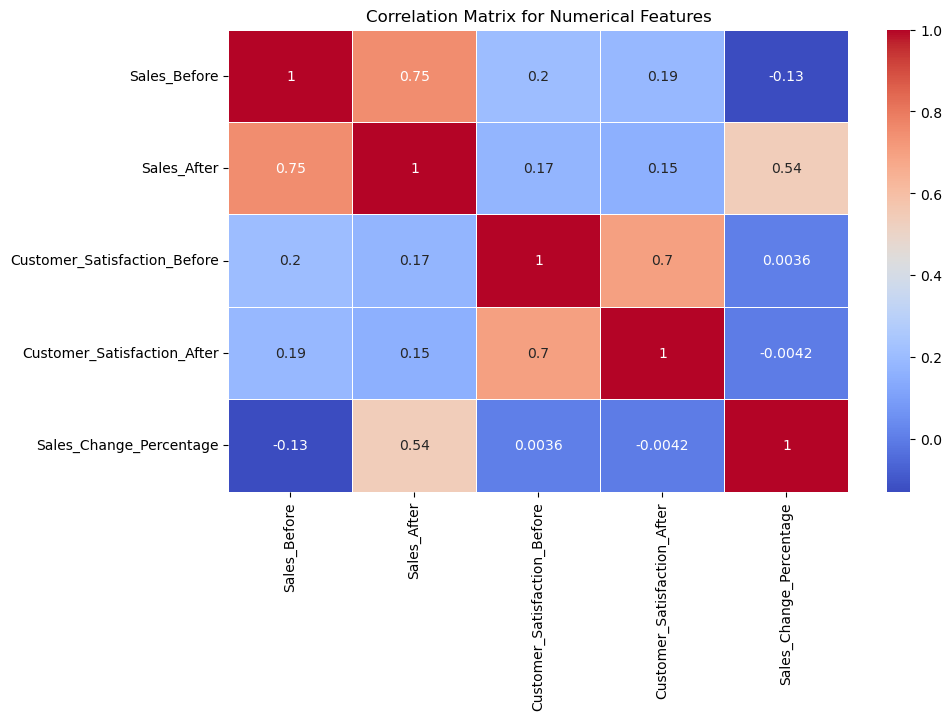

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical columns
corr_matrix = df_encoded[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

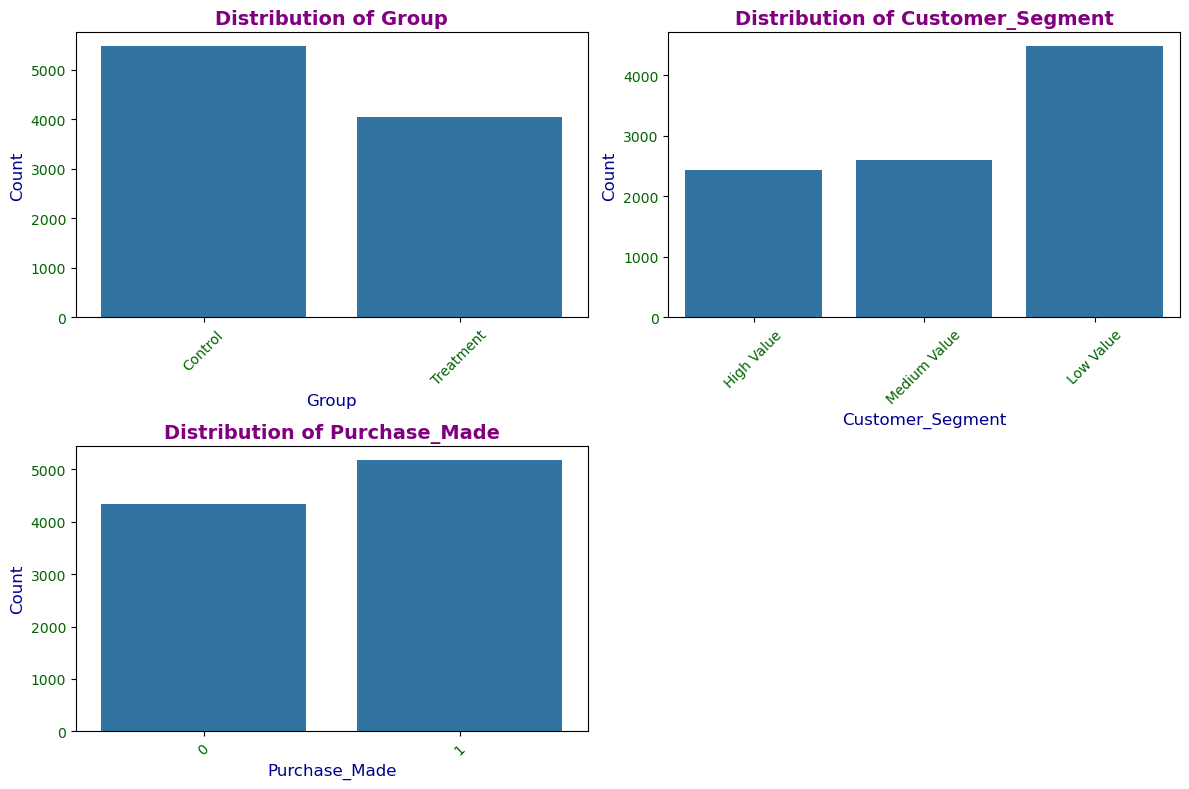

In [97]:
# List of categorical columns
categorical_columns = ['Group', 'Customer_Segment', 'Purchase_Made']

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Plot bar plots for each categorical column
for i, column in enumerate(categorical_columns):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=df_encoded[column])
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold', color='purple')
    plt.xlabel(column, fontsize=12, color='darkblue')
    plt.ylabel('Count', fontsize=12, color='darkblue')
    plt.xticks(rotation=45, color='darkgreen')
    plt.yticks(color='darkgreen')

# Adjust Layout to make sure everything fits nicely
plt.tight_layout()

# Display the plots
plt.show()

# PART 3

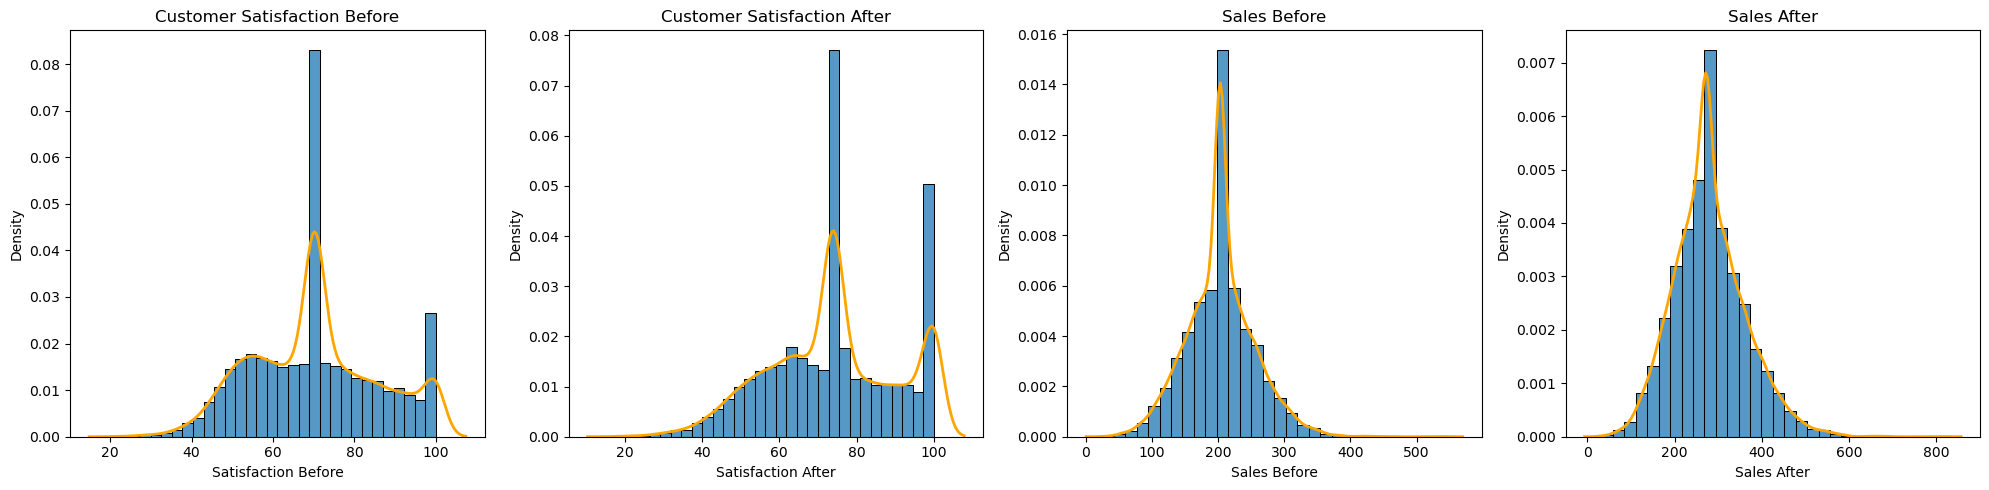

In [99]:
# Create subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Customer_Satisfaction_Before    
sns.histplot(df['Customer_Satisfaction_Before'], bins=30, edgecolor='#000000', ax=axes[0], stat='density')
sns.kdeplot(df['Customer_Satisfaction_Before'], linewidth=2, color='orange', ax=axes[0])
axes[0].set_title('Customer Satisfaction Before')
axes[0].set_xlabel('Satisfaction Before')
axes[0].set_ylabel('Density')

# Customer_Satisfaction_After
sns.histplot(df['Customer_Satisfaction_After'], bins=30, edgecolor='#000000', ax=axes[1], stat='density')
sns.kdeplot(df['Customer_Satisfaction_After'], linewidth=2, color='orange', ax=axes[1])
axes[1].set_title('Customer Satisfaction After')
axes[1].set_xlabel('Satisfaction After')
axes[1].set_ylabel('Density')
# Sales_Before   
sns.histplot(df['Sales_Before'], bins=30, edgecolor='#000000', ax=axes[2], stat='density')
sns.kdeplot(df['Sales_Before'], linewidth=2, color='orange', ax=axes[2])
axes[2].set_title('Sales Before')
axes[2].set_xlabel('Sales Before')
axes[2].set_ylabel('Density')

# Sales_After
sns.histplot(df['Sales_After'], bins=30, edgecolor='#000000', ax=axes[3], stat='density')
sns.kdeplot(df['Sales_After'], linewidth=2, color='orange', ax=axes[3])
axes[3].set_title('Sales After')
axes[3].set_xlabel('Sales After')
axes[3].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

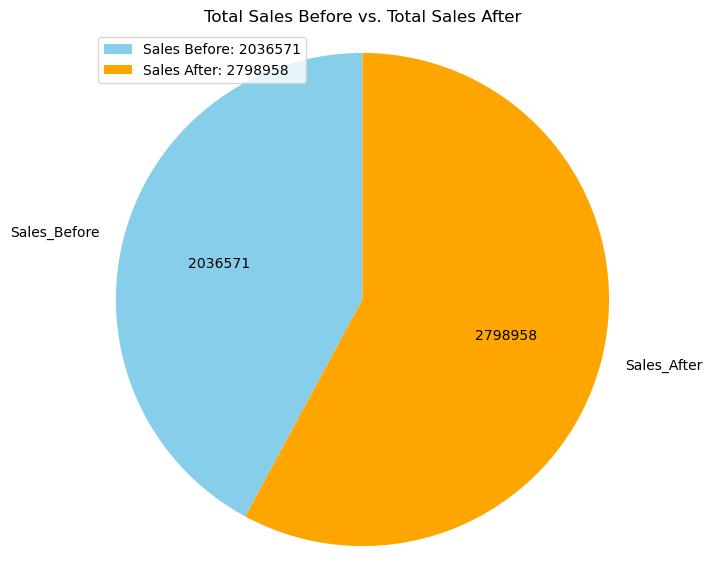

In [100]:
# Assuming df is your DataFrame containing Sales_Before and Sales_After
sales_summary = df[['Sales_Before', 'Sales_After']].sum()

# Create a pie chart to show total sales before vs. total sales after
plt.figure(figsize=(7, 7))
total_sales = sales_summary.sum()  # Calculate the total sales for the percentages
plt.pie(sales_summary, labels=sales_summary.index, startangle=90, colors=['skyblue', 'orange'],
        autopct=lambda p: f'{int(p * total_sales / 100)}' if p > 0 else '')

# Add a title
plt.title('Total Sales Before vs. Total Sales After')

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Display totals for sales before and after in a legend
plt.legend([f'Sales Before: {int(sales_summary["Sales_Before"])}', 
            f'Sales After: {int(sales_summary["Sales_After"])}'], loc='best')

plt.show()

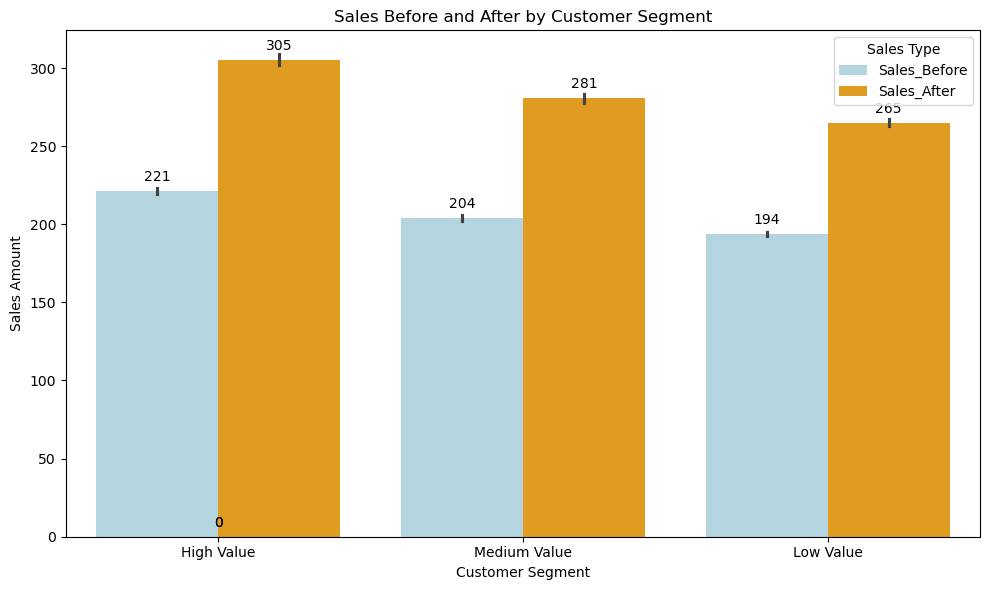

In [101]:
# Assuming df is already defined and contains 'Customer_Segment', 'Sales_Before', and 'Sales_After'

# Melt the DataFrame to long format for easier plotting
df_melted = pd.melt(df, id_vars='Customer_Segment', value_vars=['Sales_Before', 'Sales_After'],
                    var_name='Sales_Type', value_name='Sales_Amount')

# Set color palette
palette = {'Sales_Before': 'lightblue', 'Sales_After': 'orange'}
# Create the grouped bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Customer_Segment', y='Sales_Amount', hue='Sales_Type', data=df_melted, palette=palette)

# Annotate each bar with the sales amount
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 2, p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # Slightly above the bar
                      textcoords='offset points')
# Customize the plot
plt.title('Sales Before and After by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales Amount')
plt.legend(title='Sales Type')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.tight_layout()

# Show the plot

<function matplotlib.pyplot.show(close=None, block=None)>

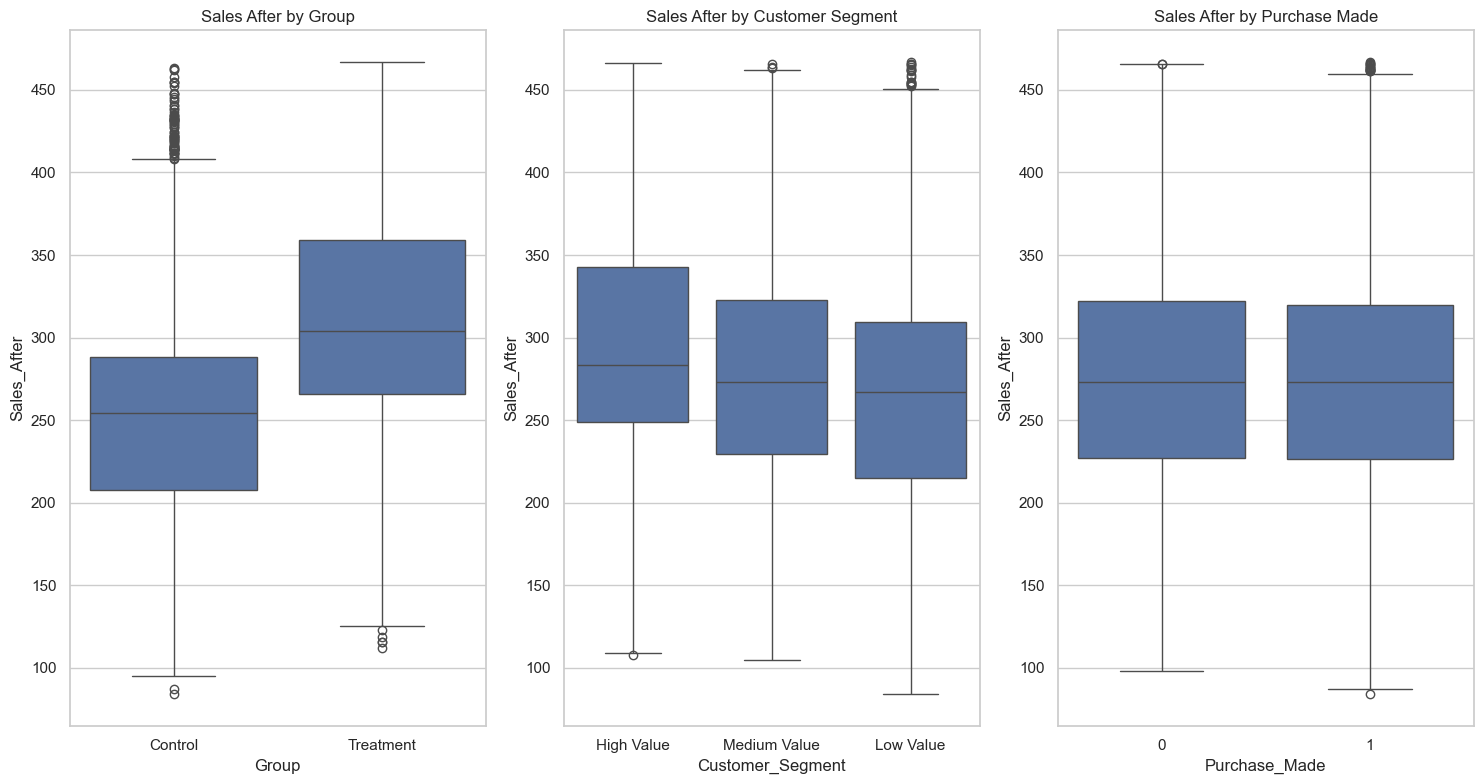

In [102]:
# Plots for categorical variable against dependant variable (Sales_After)
# Set the plot style
sns.set(style="whitegrid")

# Create subplots for box plots of each categorical variable against Sales_After
plt.figure(figsize=(15, 8))

# Box plot for 'Group' vs 'Sales_After'
plt.subplot(1, 3, 1)
sns.boxplot(x='Group', y='Sales_After', data=df_cleaned)
plt.title('Sales After by Group')

# Box plot for 'Customer_Segment' vs 'Sales_After'
plt.subplot(1, 3, 2)
sns.boxplot(x='Customer_Segment', y='Sales_After', data=df_cleaned)
plt.title('Sales After by Customer Segment')

# Box plot for 'Purchase_Made' vs 'Sales_After'
plt.subplot(1, 3, 3)
sns.boxplot(x='Purchase_Made', y='Sales_After', data=df_cleaned)
plt.title('Sales After by Purchase Made')

plt.tight_layout()
plt.show

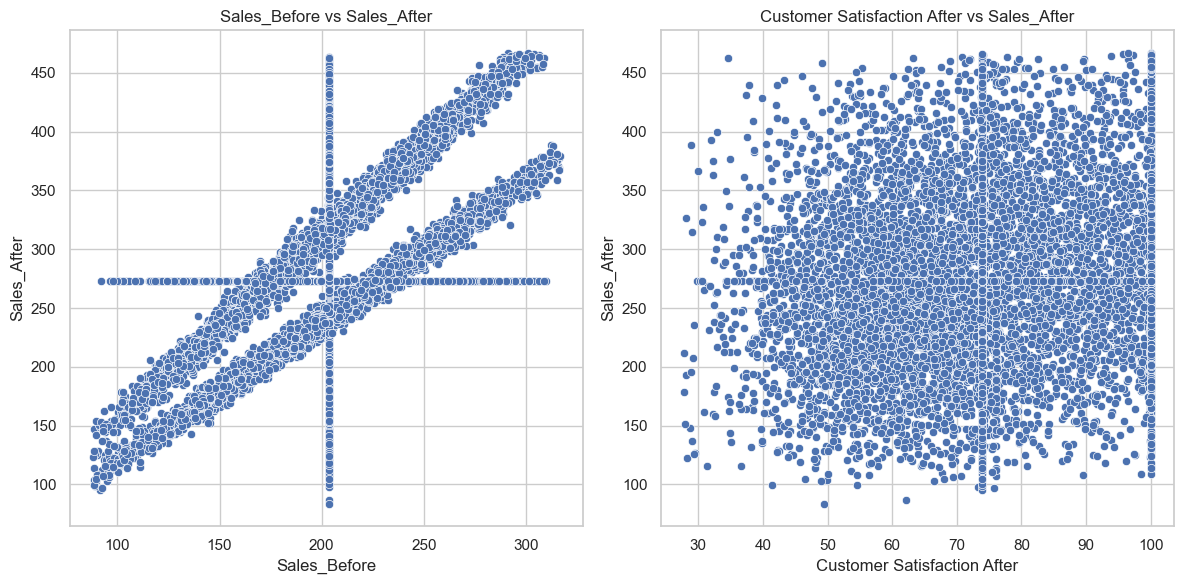

In [103]:
# Scatter plot for Sales_Before vs Sales_After
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Sales_Before', y='Sales_After', data=df_cleaned)
plt.title('Sales_Before vs Sales_After')
plt.xlabel('Sales_Before')
plt.ylabel('Sales_After')

# Scatter plot for Customer_Satisfaction_After vs Sales_After
plt.subplot(1, 2, 2)
sns.scatterplot(x='Customer_Satisfaction_After', y='Sales_After', data=df_cleaned)
plt.title('Customer Satisfaction After vs Sales_After')
plt.xlabel('Customer Satisfaction After')
plt.ylabel('Sales_After')

plt.tight_layout()
plt.show()

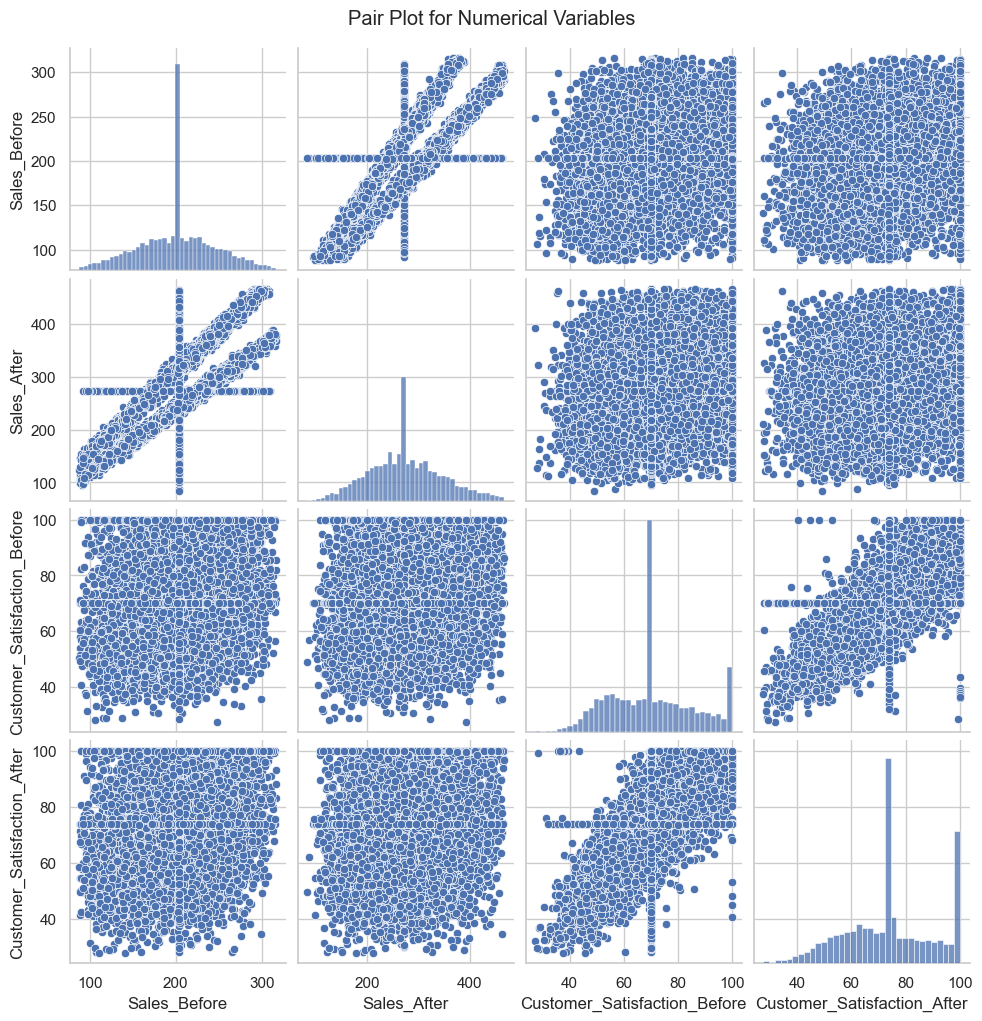

In [104]:
# Pair plot for numerical variables
sns.pairplot(df_cleaned[['Sales_Before', 'Sales_After', 'Customer_Satisfaction_Before', 'Customer_Satisfaction_After']])
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)

# Display the plot
plt.show()

# CREATING AN APP

In [127]:
##### IMPORTING LIBRARIES #################
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from collections import Counter
import dateutil.parser

In [128]:
# Load datasets
df_uncleaned = pd.read_csv(r'C:\Users\Nandata.csv')
df_cleaned = pd.read_csv(r'C:\Users\DataCleaned.csv')

In [129]:
# Function to display a welcome message
def welcome_message():
    print("\n" + "="*60)
    print(" WELCOME TO THE SALES DATA ANALYSIS APPLICATION ".center(60, ' '))
    print("="*60)
    print("This app will guide you through the process of loading your dataset,")
    print("handling missing values, analyzing sales changes, visualizing trends,")
    print("and exploring outliers and correlations in your sales data.\n")
    print("Let's get started!\n")
    print("="*60 + "\n")

In [130]:
############### MENU SYSTEM ##########################

def main_menu():
    print("Data Cleaning, Exploration, and Processing App")
    print("1. Data Cleaning/Wrangling")
    print("2. Data Exploration")
    print("3. Data Processing & Analysis")
    print("4. Exit")
    choice = input("Select an option: ")
    return choice

In [131]:
############ DATA CLEANING SECTION #################

def display_data_cleaning_menu():
    print("\nData Cleaning/Wrangling Menu:")
    print("1. Check for Missing Values")
    print("2. Detect Outliers")
    print("3. Remove Outliers")
    print("4. Back to Main Menu")

In [132]:
def check_missing_values(dataset):
    print("\nChecking for Missing Values:")
    missing_values = dataset.isnull().sum()
    print(missing_values)
    if missing_values.sum() == 0:
        print("No missing values in the dataset.")

In [133]:
def detect_outliers(df):
    df_uncleaned = df.copy()
    df[['Customer_Satisfaction_Before', 'Customer_Satisfaction_After', 'Sales_Before', 'Sales_After']].boxplot(figsize=(10, 10))

In [134]:
def detect_outliers(df):
    """
    Creates box plots for specified numerical columns to detect outliers.

    Parameters:
    df (DataFrame): The DataFrame containing data.
    """
    columns = ['Customer_Satisfaction_Before', 'Customer_Satisfaction_After', 'Sales_Before', 'Sales_After']
    df[columns].boxplot(figsize=(10, 10))
    plt.title('Box Plots for Outlier Detection')
    plt.show()

In [135]:
def remove_outliers(df):
    df_cleaned = df.copy()
    columns_to_clean = ['Customer_Satisfaction_Before', 'Customer_Satisfaction_After', 'Sales_Before', 'Sales_After']
    
    for col in columns_to_clean:
        df_cleaned = remove_outliers_iqr(df_cleaned, col)
    
    # Display boxplot after outlier removal
    df_cleaned[columns_to_clean].boxplot(figsize=(10, 6))
    plt.title("Boxplots after Removing Outliers")
    plt.show()
    
    print("Outliers removed. Here's a preview of the cleaned dataset:")
    print(df_cleaned.head())
    
    return df_cleaned

In [136]:
# Assuming Q1, Q3, and IQR are already calculated as shown previously
Q1 = df['Sales_After'].quantile(0.25)
Q3 = df['Sales_After'].quantile(0.75)
IQR = Q3 - Q1

# Clean the dataset by keeping only the non-outlier data points
df_cleaned = df[(df['Sales_After'] >= Q1 - 1.5 * IQR) & (df['Sales_After'] <= Q3 + 1.5 * IQR)]

# Print the number of remaining data points after outlier removal
print(f'Number of data points after outlier removal: {len(df_cleaned)}')

# Return the cleaned dataframe if used within a function
# return df_cleaned

# If not in a function context, simply df_cleaned continues in scope

Number of data points after outlier removal: 9800


In [137]:
def data_cleaning(df):
    df_cleaned = df  # Start with the original DataFrame

    while True:
        display_data_cleaning_menu()
        choice = input("Enter your choice (1-4): ")
        
        if choice == '1':
            df_cleaned = check_missing_values(df_cleaned)  # Update df_cleaned with the result
        elif choice == '2':
            outliers_detected = detect_outliers(df_uncleaned)  # Assuming this function returns some result
            print(outliers_detected)  # Display or handle the detected outliers as needed
        elif choice == '3':
            df_cleaned = remove_outliers(df_cleaned)  # Update df_cleaned with the result
        elif choice == '4':
            print("Returning to Main Menu.")
            break
        else:
            print("Invalid choice. Please select a valid option.")
    
    return df_cleaned  # Return the cleaned DataFrame

In [138]:
############ DATA EXPLORATION SECTION #################

def display_exploration_menu():
    print("\nData Exploration Menu:")
    print("1. Basic Statistics")
    print("2. Distribution of Numerical Variables")
    print("3. Distribution of Categorical Variables")
    print("4. Correlation Matrix")
    print("5. Heatmap of Missing Values")
    print("6. Back to Main Menu")

In [139]:
#  Define the columns with numerical data
numerical_columns = ['Sales_Before', 'Sales_After', 'Customer_Satisfaction_Before', 
                     'Customer_Satisfaction_After', 'Sales_Change_Percentage']

# Function to generate and display basic statistics
def basic_statistics(df):
    # Generate basic statistics for numerical columns
    basic_stats = df_encoded[numerical_columns].describe()
    # Display the statistics
    print("Basic Statistics:\n", basic_stats)

In [140]:
def numerical_distribution(df):
    print("\nDistribution of Numerical Variables:")
    for col in df.select_dtypes(include=["float64", "int64"]).columns:
        print(f"\nDistribution of {col}")
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

In [141]:
def categorical_distribution(df):
    print("\nDistribution of Categorical Variables:")
    categorical_columns = ['Group', 'Customer_Segment', 'Purchase_Made']
    for col in categorical_columns:
        print(f"\nDistribution of {col}")
        sns.countplot(x=df[col])
        plt.title(f"Distribution of {col}")
        plt.show()

In [142]:
def correlation_matrix(df):
    print("\nCorrelation Matrix for Numerical Features:")
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix for Numerical Features')
    plt.show()

In [143]:
def missing_values_heatmap(df):
    print("\nMissing Values Heatmap:")
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Heatmap of Missing Values")
    plt.show()

In [144]:
def data_exploration(df):
    while True:
        display_exploration_menu()
        choice = input("Enter your choice (1-6): ")
        
        if choice == '1':
            basic_statistics(df_cleaned)
        elif choice == '2':
            numerical_distribution(df_cleaned)
        elif choice == '3':
            categorical_distribution(df_cleaned)
        elif choice == '4':
            correlation_matrix(df_cleaned)
        elif choice == '5':
            missing_values_heatmap(df_uncleaned)
        elif choice == '6':
            print("Returning to Main Menu.")
            break
        else:
            print("Invalid choice. Please select a valid option.")

In [145]:
############ DATA PROCESSING & ANALYSIS SECTION #################

def display_processing_menu():
    print("\nData Processing & Analysis Menu:")
    print("1. Feature Engineering: Sales Change Percentage ")
    print("2. Label Encoding for 'Purchase_Made' ")
    print("3. Plot Histograms")
    print("4. Pie Chart")
    print("5. Grouped Bar Charts")
    print("6. Box Plots")
    print("7. Scatter Plots")
    print("8. Pair Scatter Plots")
    print("9. Back to Main Menu")

In [146]:
def feature_engineering(df):
    print("\nFeature Engineering: Adding Sales Change Percentage")
    df.loc[:, 'Sales_Change_Percentage'] = ((df['Sales_After'] - df['Sales_Before']) / df['Sales_Before']) * 100
    print(df[['Sales_Before', 'Sales_After', 'Sales_Change_Percentage']])

In [147]:
def label_encoding(df):
    # Label Encoding for 'Purchase_Made' column
    if 'Purchase_Made' in df_cleaned.columns:
        df_cleaned.loc[:, 'Purchase_Made'] = df_cleaned['Purchase_Made'].map({'Yes': 1, 'No': 0})
        print("Encoded 'Purchase_Made':\n", df_cleaned[['Purchase_Made']].head())

In [148]:
def plot_histograms(df):
    """
    Plots histograms and KDEs for selected numerical columns.
    
    Parameters:
    df (DataFrame): DataFrame containing the columns to plot.
    """
    # Create subplots (1 row, 4 columns)
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # Customer_Satisfaction_Before    
    sns.histplot(df['Customer_Satisfaction_Before'], bins=30, edgecolor='#000000', ax=axes[0], stat='density')
    sns.kdeplot(df['Customer_Satisfaction_Before'], linewidth=2, color='orange', ax=axes[0])
    axes[0].set_title('Customer Satisfaction Before')
    axes[0].set_xlabel('Satisfaction Before')
    axes[0].set_ylabel('Density')

    # Customer_Satisfaction_After
    sns.histplot(df['Customer_Satisfaction_After'], bins=30, edgecolor='#000000', ax=axes[1], stat='density')
    sns.kdeplot(df['Customer_Satisfaction_After'], linewidth=2, color='orange', ax=axes[1])
    axes[1].set_title('Customer Satisfaction After')
    axes[1].set_xlabel('Satisfaction After')
    axes[1].set_ylabel('Density')

    # Sales_Before   
    sns.histplot(df['Sales_Before'], bins=30, edgecolor='#000000', ax=axes[2], stat='density')
    sns.kdeplot(df['Sales_Before'], linewidth=2, color='orange', ax=axes[2])
    axes[2].set_title('Sales Before')
    axes[2].set_xlabel('Sales Before')
    axes[2].set_ylabel('Density')

 # Sales_After
    sns.histplot(df['Sales_After'], bins=30, edgecolor='#000000', ax=axes[3], stat='density')
    sns.kdeplot(df['Sales_After'], linewidth=2, color='orange', ax=axes[3])
    axes[3].set_title('Sales After')
    axes[3].set_xlabel('Sales After')
    axes[3].set_ylabel('Density')

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [149]:
def pie_chart(df):
    """
    Plots a pie chart comparing total sales before and after.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Sales_Before' and 'Sales_After' columns.
    """
    sales_summary = df[['Sales_Before', 'Sales_After']].sum()

    # Create a pie chart to show total sales before vs. total sales after
    plt.figure(figsize=(7, 7))
    total_sales = sales_summary.sum()  # Calculate total sales for the percentages
    plt.pie(sales_summary, labels=sales_summary.index, startangle=90, colors=['skyblue', 'orange'],
            autopct=lambda p: f'{int(p * total_sales / 100)}' if p > 0 else '')

    # Add a title
    plt.title('Total Sales Before vs. Total Sales After')

    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

    # Display totals for sales before and after in a legend
    plt.legend([f'Sales Before: {int(sales_summary["Sales_Before"])}', 
                f'Sales After: {int(sales_summary["Sales_After"])}'], loc='best')

    plt.show()

In [150]:
def grouped_bar_charts(df):
    """
    Plots a grouped bar chart showing sales before and after by customer segment.

    Parameters:
    df (DataFrame): DataFrame containing 'Customer_Segment', 'Sales_Before', and 'Sales_After' columns.
    """
    # Melt the DataFrame to long format for easier plotting
    df_melted = pd.melt(df, id_vars='Customer_Segment', value_vars=['Sales_Before', 'Sales_After'],
                        var_name='Sales_Type', value_name='Sales_Amount')

    # Set color palette
    palette = {'Sales_Before': 'lightblue', 'Sales_After': 'orange'}
    
    # Create the grouped bar chart
    plt.figure(figsize=(10, 6))
    bar_plot = sns.barplot(x='Customer_Segment', y='Sales_Amount', hue='Sales_Type', data=df_melted, palette=palette)

    # Annotate each bar with the sales amount
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_height():,.0f}', 
                          (p.get_x() + p.get_width() / 2, p.get_height()), 
                          ha='center', va='bottom', 
                          fontsize=10, color='black', 
                          xytext=(0, 5),  # Slightly above the bar
                          textcoords='offset points')
      # Customize the plot
    plt.title('Sales Before and After by Customer Segment')
    plt.xlabel('Customer Segment')
    plt.ylabel('Sales Amount')
    plt.legend(title='Sales Type')
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Show the plot
    plt.show()

In [151]:
def box_plots(df):
    """
    Plots box plots for categorical variables against 'Sales_After'.

    Parameters:
    df (DataFrame): DataFrame containing 'Group', 'Customer_Segment', 'Purchase_Made', and 'Sales_After' columns.
    """
    # Set the plot style
    sns.set(style="whitegrid")

    # Create subplots for box plots of each categorical variable against Sales_After
    plt.figure(figsize=(15, 8))

    # Box plot for 'Group' vs 'Sales_After'
    plt.subplot(1, 3, 1)
    sns.boxplot(x='Group', y='Sales_After', data=df)
    plt.title('Sales After by Group')

    # Box plot for 'Customer_Segment' vs 'Sales_After'
    plt.subplot(1, 3, 2)
    sns.boxplot(x='Customer_Segment', y='Sales_After', data=df)
    plt.title('Sales After by Customer Segment')

    # Box plot for 'Purchase_Made' vs 'Sales_After'
    plt.subplot(1, 3, 3)
    sns.boxplot(x='Purchase_Made', y='Sales_After', data=df)
    plt.title('Sales After by Purchase Made')

    plt.tight_layout()
    plt.show()

In [152]:
def scatter_plots(df):
    """
    Plots scatter plots for relationships between selected variables.

    Parameters:
    df (DataFrame): DataFrame containing 'Sales_Before', 'Sales_After', and 'Customer_Satisfaction_After' columns.
    """
    plt.figure(figsize=(12, 6))

    # Scatter plot for Sales_Before vs Sales_After
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='Sales_Before', y='Sales_After', data=df)
    plt.title('Sales_Before vs Sales_After')
    plt.xlabel('Sales_Before')
    plt.ylabel('Sales_After')

    # Scatter plot for Customer_Satisfaction_After vs Sales_After
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='Customer_Satisfaction_After', y='Sales_After', data=df)
    plt.title('Customer Satisfaction After vs Sales_After')
    plt.xlabel('Customer Satisfaction After')
    plt.ylabel('Sales_After')

    plt.tight_layout()
    plt.show()

In [153]:
def pair_scatter_plots(df):

    """
    Plots pairwise relationships for numerical variables in a DataFrame.

    Parameters:
    df (DataFrame): DataFrame containing the numerical columns to plot.
    """
    sns.pairplot(df[['Sales_Before', 'Sales_After', 'Customer_Satisfaction_Before', 'Customer_Satisfaction_After']])
    plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
    plt.show()

In [154]:
def data_processing_menu(df):
    while True:
        display_processing_menu()
        choice = input("Enter your choice (1-9): ")
        
        if choice == '1':
            feature_engineering(df)
        elif choice == '2':
            label_encoding(df)
        elif choice == '3':
            plot_histograms(df)
        elif choice == '4':
            pie_chart(df)
        elif choice == '5':
            grouped_bar_charts(df)
        elif choice == '6':
            box_plots(df)
        elif choice == '7':
            scatter_plots(df)
        elif choice == '8':
            pair_scatter_plots(df)
        elif choice == '9':
            print("Returning to Main Menu.")
            break
        else:
            print("Invalid choice. Please select a valid option.")

In [ ]:
############## MAIN LOOP ###################

def main():
    while True:
        choice = main_menu()
        if choice == '1':
            data_cleaning(df_uncleaned)
        elif choice == '2':
            data_exploration(df_cleaned)
        elif choice == '3':
            data_processing_menu(df_cleaned)
        elif choice == '4':
            print("Exiting the Application.")
            break
        else:
            print("Invalid choice. Please select a valid option.")

if __name__ == "__main__":
    main()

Data Cleaning, Exploration, and Processing App
1. Data Cleaning/Wrangling
2. Data Exploration
3. Data Processing & Analysis
4. Exit


Select an option:  1



Data Cleaning/Wrangling Menu:
1. Check for Missing Values
2. Detect Outliers
3. Remove Outliers
4. Back to Main Menu
